<a href="https://colab.research.google.com/github/AnishaA-git/zoomApi/blob/master/heart_failure_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install kmeans-pytorch


In [37]:

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from kmeans_pytorch import kmeans, kmeans_predict

%matplotlib inline

In [28]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.shape


(299, 13)

In [48]:
# data
data_size, dims, num_clusters = 299, 13, 4
x = np.random.randn(data_size, dims) / 6
x = torch.from_numpy(x)

In [49]:
# set device
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [52]:
# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean', device=device
)

running k-means on cpu..





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=3.378631, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00, 94.34it/s, center_shift=0.057960, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 112.80it/s, center_shift=0.025499, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00, 122.24it/s, center_shift=0.009922, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 126.34it/s, center_shift=0.009102, iteration=5, tol=0.000100]


[running kmeans]: 5it [00:00, 129.29it/s, center_shift=0.018791, iteration=6, tol=0.000100]


[running kmeans]: 6it [00:00, 131.35it/s, center_shift=0.008402, iteration=7, tol=0.000100]


[running kmeans]: 7it [00:00, 135.49it/s, center_shift=0.005218, iteration=8, tol=0.000100]


[running kmeans]: 8it [00:00, 138.45it/s, center_shift=0.002109, iteration=9, tol=0.000100]


[running kmeans]: 9it [00:00, 140.74it/s, center_shift=0.003437, iteration=10, tol=0.000100]


[running kmeans]: 10it 

In [53]:
# cluster IDs and cluster centers
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 3, 1, 1, 1, 0, 3, 3, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1,
        1, 2, 2, 1, 1, 1, 2, 1, 3, 2, 3, 0, 1, 2, 2, 2, 0, 3, 3, 3, 2, 2, 2, 0,
        1, 1, 2, 3, 3, 3, 1, 3, 0, 1, 3, 1, 2, 0, 3, 3, 0, 2, 1, 1, 2, 2, 0, 0,
        1, 3, 0, 3, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 3, 0, 3, 3, 1, 1, 2, 0, 0,
        2, 3, 3, 2, 1, 1, 0, 2, 1, 1, 0, 3, 1, 0, 2, 3, 0, 3, 1, 2, 1, 0, 1, 1,
        3, 2, 1, 0, 3, 2, 1, 2, 3, 3, 2, 2, 3, 1, 1, 0, 2, 1, 3, 1, 0, 3, 0, 2,
        1, 3, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 2, 1, 0, 2, 2, 2, 3, 2, 2, 1, 1, 0,
        2, 0, 1, 2, 3, 1, 0, 2, 0, 0, 0, 2, 0, 0, 3, 1, 1, 1, 1, 2, 0, 1, 1, 2,
        0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 3, 0, 0, 2,
        0, 3, 2, 2, 0, 3, 3, 0, 2, 2, 3, 1, 2, 3, 2, 2, 3, 2, 2, 0, 0, 1, 3, 2,
        2, 2, 2, 3, 1, 3, 1, 2, 0, 2, 3, 2, 2, 3, 3, 1, 3, 3, 0, 3, 0, 0, 1, 0,
        1, 2, 1, 3, 0, 0, 0, 3, 2, 2, 0, 2, 2, 2, 3, 0, 1, 3, 3, 1, 3, 1, 0, 0,
        1, 0, 0, 3, 0, 1, 0, 0, 2, 1, 1]

In [54]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(df, cluster_centers):
	colNames = list(df)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(cluster_centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [55]:
# Function that creates Parallel Plots

def parallel_plot(df):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(df, 'prediction', color = my_colors, marker='o')

In [56]:
P = pd_centers(df, cluster_centers)
P

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,prediction
0,0.004781,-0.055699,-0.045496,-0.006719,0.187743,0.033810,-0.040058,0.043504,-0.054008,0.014149,0.035713,-0.005127,-0.025372,0
1,-0.041160,0.007613,-0.062459,0.086327,-0.027596,-0.143948,-0.085025,-0.065016,0.035038,0.056495,-0.108729,0.042655,0.024112,1
2,0.041103,0.116531,0.118911,-0.041107,-0.070717,0.090214,-0.034860,-0.015165,0.036291,0.004165,-0.050631,0.032917,0.000521,2
3,-0.062112,-0.121873,0.015904,0.007802,-0.050790,-0.024055,0.136470,-0.030355,0.028502,-0.025186,0.086969,-0.159797,-0.011455,3


Heart Failure Event

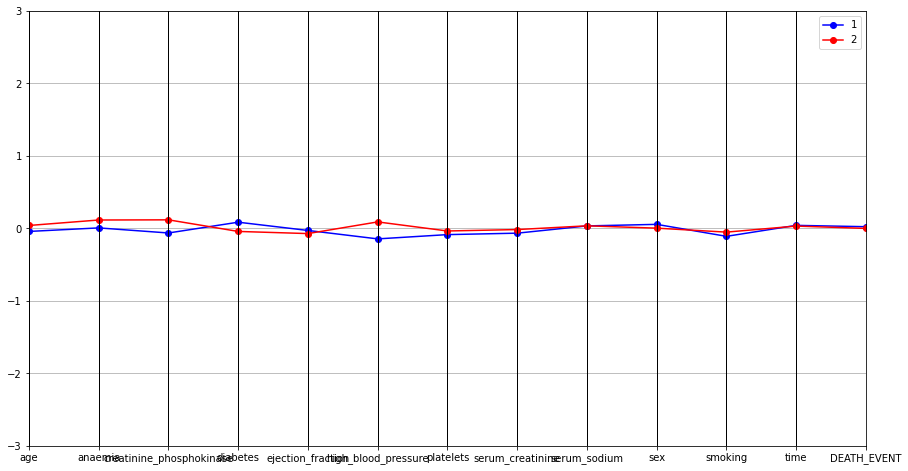

In [58]:
parallel_plot(P[P['DEATH_EVENT'] > 0 ])


No Heart Failure Event

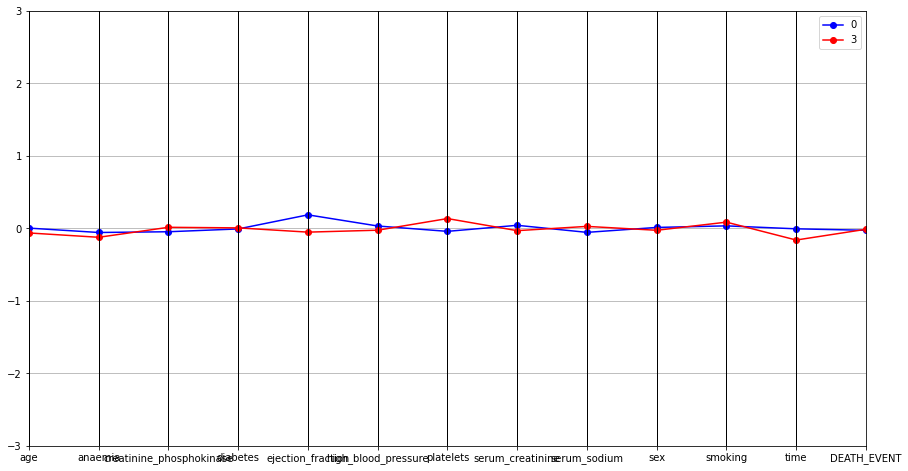

In [59]:
parallel_plot(P[P['DEATH_EVENT'] < 0 ])
